<h1><center>SCC0270 - Redes Neurais e Aprendizado Profundo</center></h1>
<h5><center>Prof.ª Dr.ª Roseli Aparecida Francelin Romero</center></h5>

---

<h2><center>Exercício 4 - Keras e MNIST</center></h2>

---

> **Helbert Moreira Pinto** - Nº USP: 10716504
>
> **João Marcos Della Torre Divino** - Nº USP: 10377708

---

# Bibliotecas utilizadas

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from skimage import color

# Funções auxiliares

In [ ]:
# Função para carregar novas imagens de dígitos
def load_new_data():
  
  filename = ["0_v1.png", "0_v2.png", "1_v1.png", "1_v2.png", "2_v1.png", "2_v2.png",
              "3_v1.png", "3_v2.png", "4_v1.png", "4_v2.png", "5_v1.png", "5_v2.png",
              "6_v1.png", "6_v2.png", "7_v1.png", "7_v2.png", "8_v1.png", "8_v2.png",
              "9_v1.png", "9_v2.png"]
  
  data    = []
  labels  = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

  for i in range(len(filename)):
    img     = plt.imread("digitos/" + filename[i]) # ("digitos/" + filename[i])
    imgGray = (((-1.0)*(color.rgb2gray(img))) + 1.0)
    data.append(imgGray)
  
  data = np.array(data)
  data = data.reshape(data.shape[0], 28, 28, 1)

  return data, labels

In [ ]:
# Função para exibir os resultados do treinamento
def train_results(historico, epocas):
  
  acc     = historico['accuracy']
  val_acc = historico['val_accuracy']

  loss      = historico['loss']
  val_loss  = historico['val_loss']

  epochs_range = range(epocas)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Acurácia do treino')
  plt.plot(epochs_range, val_acc, label='Acurácia da validação')
  plt.legend(loc='lower right')
  plt.title('Acurácia do treino e validação')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Perda no treino')
  plt.plot(epochs_range, val_loss, label='Perda na validação')
  plt.legend(loc='upper right')
  plt.title('Perda no treino e validação')
  plt.show()

In [ ]:
# Função para exibir o digito e se o modelo conseguiu classificar corretamente
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)



In [ ]:
# Função auxiliar para exibir os resultados
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Carregando o *dataset* MNIST

In [ ]:
# Carregando o dataset
mnist = tf.keras.datasets.mnist

In [ ]:
# Separando os dados em treino e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Explorando o dataset
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

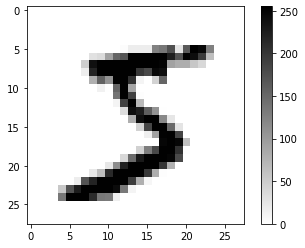

digito: 5


In [ ]:
# Visualizando os dados
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print(f'digito: {y_train[0]}')

# Normalização dos dados
> Como pode ser visto, o valor dos pixels da imagem estão no intervalo $[0; 255]$. Ora, é preciso normalizá-los para o intervalo $[0; 1]$ antes de alimentar a rede com tais dados.

In [ ]:
# Normalizando os dados
X_train, X_test = (X_train / 255.0), (X_test / 255.0)

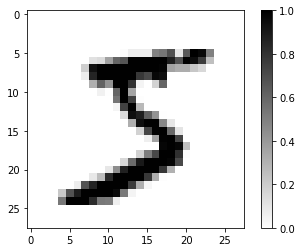

In [ ]:
# Visualizando os dados após normalização
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Redimensionando os dados
> Para adequar os dados ao formato solicitado pelo Keras para as etapas de convolução, é preciso redimensionar os dados, adicionando uma nova dimensão, que seria como o canal de cor da imagem (neste caso, uma dimensão, por ser monocromático).

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Criando a rede convolucional para classificação
> Foram solicitadas as seguintes configurações para a rede convolucional:
>  * Camadas de convolução e pooling no modelo;
>  * Testar 3 tamanhos diferentes de filtros nas camadas de convolução;
>  * Uma camada totalmente conectada antes da camada softmax.
>
> Levando isso em conta, foram desenvolvidos 3 modelos, os quais são apresentados abaixo.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

## Modelo 1  
> **Filtro de tamanho 16** nas camadas de convolução

In [ ]:
# Definindo o modelo
model_16 = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)),  # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Conv2D(16, 3, activation='relu'),                           # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Flatten(),                                                  # Subamostragem (flatten)
    tf.keras.layers.Dense(128, activation='relu'),                              # Camada densa (128 neurônios) + ReLU
    tf.keras.layers.Dense(10, activation='softmax')                             # Camada softmax (10 neurônios - um por classe)
  ])

# Compilando o modelo
model_16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model_16.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

## Modelo 2
> **Filtro de tamanho 32** nas camadas de convolução

In [ ]:
# Definindo o modelo
model_32 = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),  # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Conv2D(32, 3, activation='relu'),                           # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Flatten(),                                                  # Subamostragem (flatten)
    tf.keras.layers.Dense(128, activation='relu'),                              # Camada densa (128 neurônios) + ReLU
    tf.keras.layers.Dense(10, activation='softmax')                             # Camada softmax (10 neurônios - um por classe)
  ])

# Compilando o modelo
model_32.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model_32.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Modelo 3
> **Filtro de tamanho 64** nas camadas de convolução

In [ ]:
# Definindo o modelo
model_64 = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)),  # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Conv2D(64, 3, activation='relu'),                           # Camada convolucional + ReLU
    tf.keras.layers.MaxPooling2D(),                                             # Subamostragem
    tf.keras.layers.Flatten(),                                                  # Subamostragem (flatten)
    tf.keras.layers.Dense(128, activation='relu'),                              # Camada densa (128 neurônios) + ReLU
    tf.keras.layers.Dense(10, activation='softmax')                             # Camada softmax (10 neurônios - um por classe)
  ])

# Compilando o modelo
model_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model_64.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

## Treinamento das redes

In [ ]:
epocas = 5
validacao = 0.2

In [ ]:
train_16 = model_16.fit(X_train, y_train, epochs=epocas, validation_split=validacao)

Epoch 1/5
1500/1500 [==============================] - 24s 15ms/step - loss: 0.1988 - accuracy: 0.9406 - val_loss: 0.0666 - val_accuracy: 0.9799
Epoch 2/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 3/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0431 - val_accuracy: 0.9873
Epoch 5/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0414 - val_accuracy: 0.9884


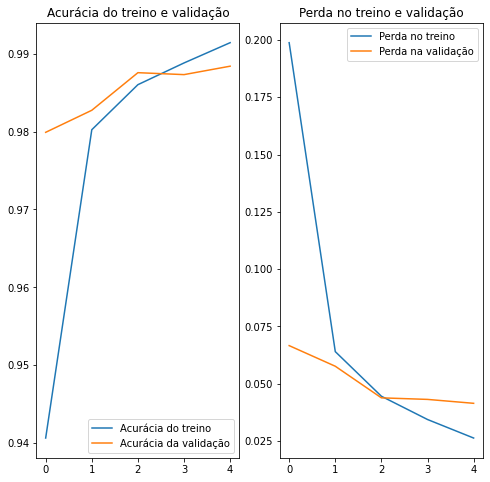

In [ ]:
train_results(train_16.history, epocas)

In [ ]:
train_32 = model_32.fit(X_train, y_train, epochs=epocas, validation_split=validacao)

Epoch 1/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1618 - accuracy: 0.9503 - val_loss: 0.0556 - val_accuracy: 0.9849
Epoch 2/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0488 - val_accuracy: 0.9852
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0365 - val_accuracy: 0.9905
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 5/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 0.9886


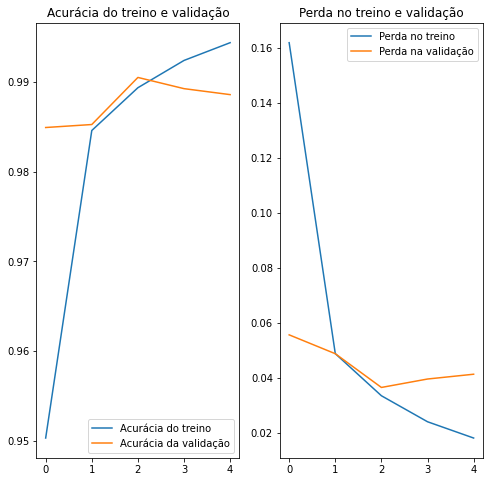

In [ ]:
train_results(train_32.history, epocas)

In [ ]:
train_64 = model_64.fit(X_train, y_train, epochs=epocas, validation_split=validacao)

Epoch 1/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1394 - accuracy: 0.9562 - val_loss: 0.0526 - val_accuracy: 0.9861
Epoch 2/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0457 - val_accuracy: 0.9865
Epoch 3/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0366 - val_accuracy: 0.9891
Epoch 4/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 5/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0381 - val_accuracy: 0.9893


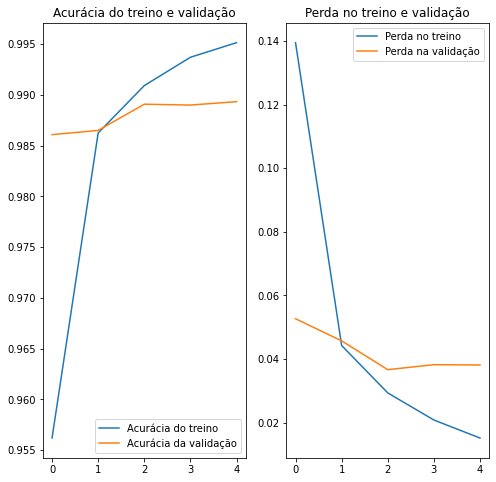

In [ ]:
train_results(train_64.history, epocas)

## Teste das redes

In [ ]:
# Avaliando o modelo
model_16.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0361 - accuracy: 0.9884 - 1s/epoch - 5ms/step


[0.03607882931828499, 0.9883999824523926]

In [ ]:
# Avaliando o modelo
model_32.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0348 - accuracy: 0.9892 - 2s/epoch - 6ms/step


[0.03481077030301094, 0.9891999959945679]

In [ ]:
# Avaliando o modelo
model_64.evaluate(X_test, y_test, verbose=2)

313/313 - 3s - loss: 0.0315 - accuracy: 0.9899 - 3s/epoch - 9ms/step


[0.03151592239737511, 0.9898999929428101]

# Avaliação da rede com novos dados

In [ ]:
new_X, new_y = load_new_data()

In [ ]:
# Predição das novas imagens fornecidas
predictions = model_64.predict(new_X)

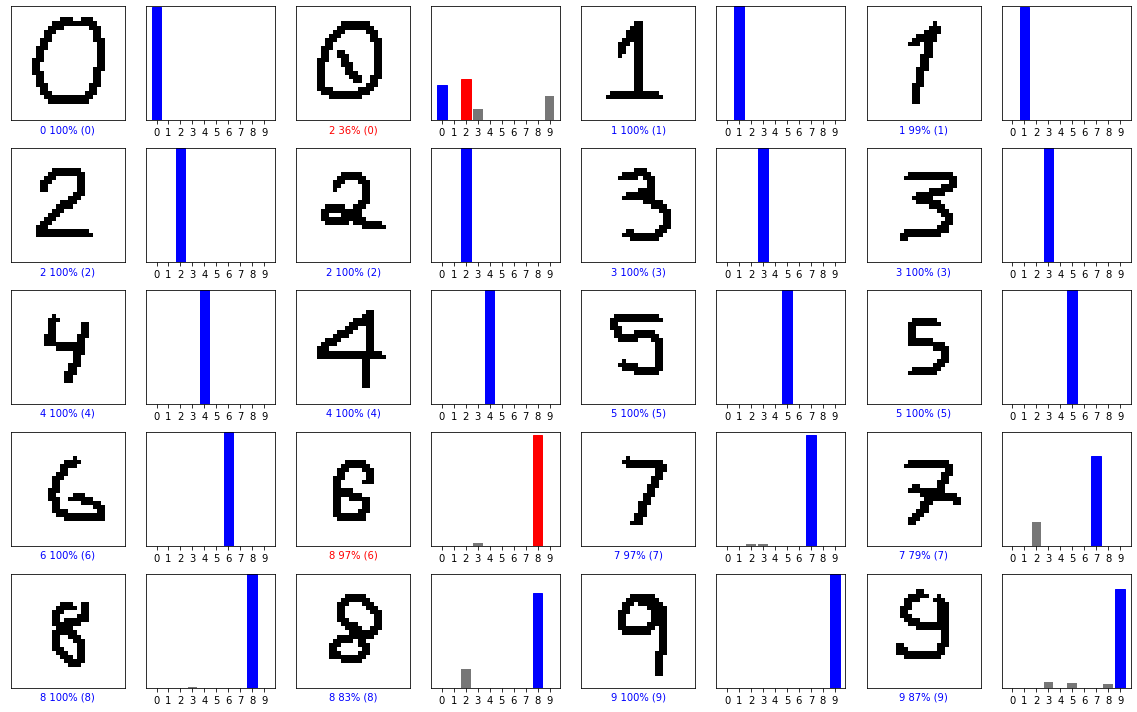

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], new_y, new_X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], new_y)
plt.tight_layout()
plt.show()

## Resultados

Pode-se observar que os 3 modelos tiveram um bom desempenho e conseguiram classificar bem os dígitos. Isso se deve ao fato do dataset possuir classes bem definidas, sendo um conjunto de dados muito utilizado para calibração de modelos de aprendizado profundo.  

Em termos dos tamanhos dos filtros utilizados, pode-se considerar que o modelo cujo filtro possui tamanho 16 obteve o melhor custo-beneficio em termos de acurácia e tempo de execução pois os ganhos de acurácia nos modelos mais complexos não foram significativos.  

Por fim, quando fornecemos digitos desenhados pela dupla, notamos que o modelo manteve o bom desempenho, tanto que em casos onde o digito adimite grafias diferentes, vemos que o modelo conseguiu interpretar corretamente, por exemplo os digitos 2 e 4. Entretanto, mesmo utilizando o modelo que obteve a melhor acurácia nos testes, vemos que houve casos em que o modelo não conseguiu identificar qual era o dígito correto. Isso ocorre porque inserirmos alguns casos cuja classificação pudesse causar duvidas no modelo. 